<a href="https://colab.research.google.com/github/macodebcn/datascience_samples/blob/main/%233_clustering_linear_regression_%26%20more.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# clustering, linear regression and more...

In [ ]:
# preparamos todo para comenzar

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


El tamaño del dataset es:
 (344, 7)

El nombre de las colmnas es el siguiente:
 Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Estas son las 3 primeras filas del dataset:
   species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  

Estadísticos antes de correcciones: 
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        342.000000       342.000000         342.000000   342.000000
mean          43.921930        17.151170         215.008772  4201.754386
std            5.459584         1.974793         259.879698   80

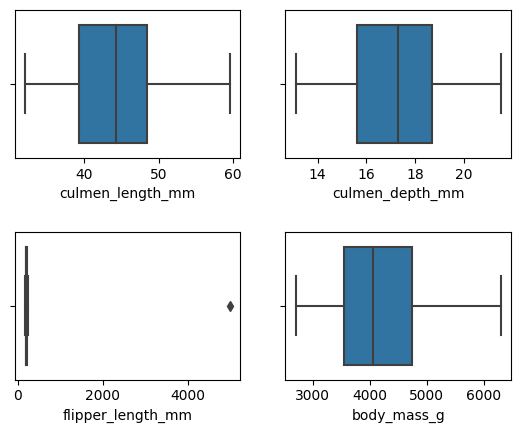


Aquí tenemos el valor anómalo corregido en 'flipper_length_mm': 


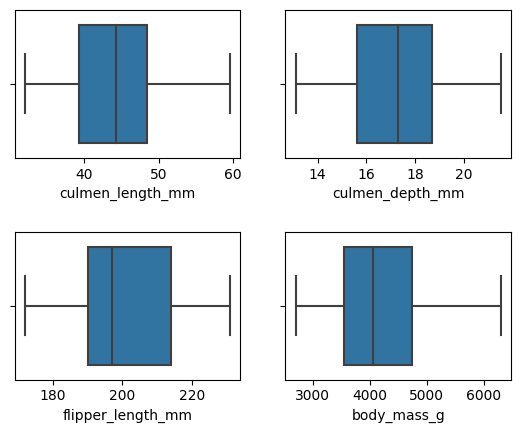


Estadísticos de nuevo: 
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        344.000000       344.000000         344.000000   344.000000
mean          43.921930        17.151170         201.046563  4201.754386
std            5.443643         1.969027          14.017455   799.613058
min           32.100000        13.100000         172.000000  2700.000000
25%           39.275000        15.600000         190.000000  3550.000000
50%           44.250000        17.300000         197.000000  4050.000000
75%           48.500000        18.700000         214.000000  4750.000000
max           59.600000        21.500000         231.000000  6300.000000

Estos son los valores únicos: 
['MALE' 'FEMALE' '.']

Este es el recuento de valores: 
MALE      178
FEMALE    165
.           1
Name: sex, dtype: int64


MALE      178
FEMALE    165
Name: sex, dtype: int64
species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
fl

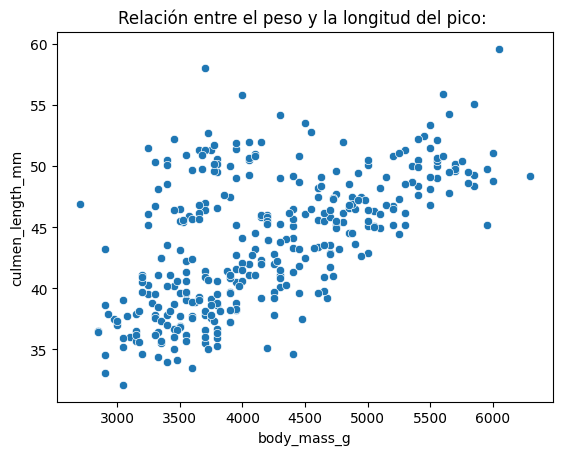

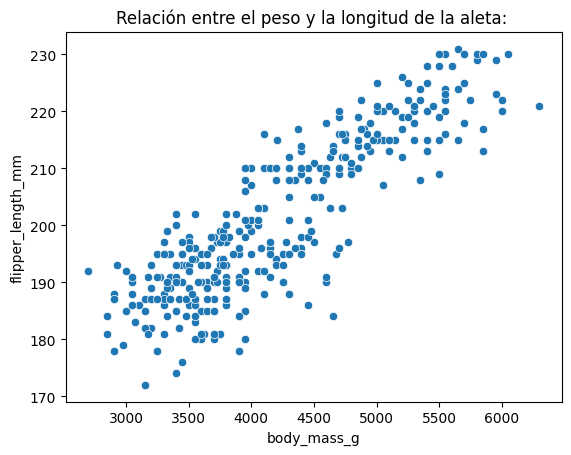


Esta es la correlación peso-pico:  0.5951098244376302

Esta es la correlación peso-aleta:  0.8696242804667231


In [ ]:
# Respuesta

# importamos las librerías necesarias para el ejercicio aquí arriba

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

peng = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/prog_datasci_7/data/penguins_size.csv")

# a, mostramos el tamaño con <shape>
# comprobamos que tiene 344 filas y 7 columnas

print("El tamaño del dataset es:\n",peng.shape)
print()

# ahora vemos el nombre de la columnas

print("El nombre de las colmnas es el siguiente:\n",peng.columns)
print()

# vamos a ver la 3 primeras filas

print("Estas son las 3 primeras filas del dataset:\n",peng.head(n=3))

# <species> es el nombre de la especie al que se refiere
# <island> es la isla en la que se encuentra el pingüino
# <culmen_length_mm> es la longitud del pico, <culmen_depth_mm>, es la profundidad
# <lipper_length_mm> es la longitud de la aleta del pingüino
# <body_mass_g> es la masa corporal del pingüino
# <sex> indica si es macho o hembra

print()

# ya que estamos, vamos a ver los datos estadísticos

print("Estadísticos antes de correcciones: ")
print(peng.describe())

# b, comprobemos ahora si hay valores <nan> en el "dataset"; lo hacemos y
# comprobamos que sí tenemos algunos valores erróneos que debemos corregir

print()

print("Los valores nulos para cada variable son: ")
print(peng.isna().sum())

print()

# Creamos los imputadores para corregir los datos erróneos

num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

# Rellenamos los valores perdidos en las columnas numéricas con la media
# hicimos algo similar durante la anterior práctica

peng[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]] = num_imputer.fit_transform(peng[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]])

# Rellenamos los valores perdidos en la columna 'sex' con el valor más frecuente
# al tratarse de una variable categórica, el valor más frecuente es más adecuado

peng["sex"] = cat_imputer.fit_transform(peng["sex"].values.reshape(-1, 1))

print()

print("Estos son los valores para cada variable tras aplicar : ")
print(peng.isnull().sum())

print()

# c, para comprobar los valores anómalos, vamos a crear unos gráficos "boxplot"

print("Tenemos el valor anómalo en 'flipper_length_mm': " )

fig, axs = plt.subplots(2, 2)
sns.boxplot(x=peng["culmen_length_mm"], ax=axs[0, 0])
sns.boxplot(x=peng["culmen_depth_mm"], ax=axs[0, 1])
sns.boxplot(x=peng["flipper_length_mm"], ax=axs[1, 0])
sns.boxplot(x=peng["body_mass_g"], ax=axs[1, 1])
plt.subplots_adjust(hspace = 0.5)
plt.show()

print()

# Antes de pasar a la variable del género vamos a corregir el valor anómalo
# en <flipper_length> con la mediana, menos sensible a los valores extremos
# https://decodingdatascience.com/central-tendency-statistics-understanding-mean-median-and-mode/
# creamos una copia del "dataset" original para mostrar las diferencias
# trabajaremos con la copia para preservar el original, ya que si no hacemos
# esto, Colab mostrará bien los datos en el primer "run", sin embargo no en las
# sucesivas si vamos comprobando que todo está bien a medida que trabajamos

peng_anml = peng.copy()

mediana = peng_anml["flipper_length_mm"].median()

peng_anml.loc[peng["flipper_length_mm"] == 5000.0, "flipper_length_mm"] = mediana

# copiamos el código del gráfico para que se vea la modificación
# en este punto es importante trabajar con la variable correcta porque de lo
# contrario seguiríamos mostrando el outlier...cosa que nos ha sucedido en una
# práctica anterior, así que, si todo es correcto, no deberíamos ver ese valor
# anómalo de <flipper_length_mm>

print("Aquí tenemos el valor anómalo corregido en 'flipper_length_mm': ")

fig, axs = plt.subplots(2, 2)
sns.boxplot(x=peng_anml["culmen_length_mm"], ax=axs[0, 0])
sns.boxplot(x=peng_anml["culmen_depth_mm"], ax=axs[0, 1])
sns.boxplot(x=peng_anml["flipper_length_mm"], ax=axs[1, 0])
sns.boxplot(x=peng_anml["body_mass_g"], ax=axs[1, 1])
plt.subplots_adjust(hspace = 0.5)
plt.show()

print()

# volvemos a mostrar los estadísticos básicos

print("Estadísticos de nuevo: ")
print(peng_anml.describe())

print()

# la forma más directa en este caso sería contar cuántos valores tenemos de
# "male/female" y comprobar si concuerda con el el "shape" del conjunto de datos
# que como hemos visto es de 344 filas y 7 columnas
# así que primero veamos si todo son "male/female" y a continuación utilizaremos
# <value_counts> para la comprobación final
# podemos comprobar que aparece un valor "." (un punto)
# tratándose de una única observación nos planteamos la eliminación de la fila
# en cuestión (es la 336), descartamos sustituir el valor por "Female", que es
# lo más probable dado el peso (normalmente el peso más elevado es del de los machos)
# porque como no estamos seguros al 100% generaríamos otro error
# en esta ocasión nos inclinamos por rellenar con un valor <nan>


print("Estos son los valores únicos: ")
print(peng_anml["sex"].unique())

print()

print("Este es el recuento de valores: ")
print(peng_anml["sex"].value_counts())

print()

import numpy as np

# importamos numpy para reemplazar
# Reemplazamos el valor erróneo por <nan>

peng_anml["sex"] = peng_anml["sex"].replace(".", np.nan)

print()

print(peng_anml["sex"].value_counts())

print(peng_anml.isna().any())

print()

# podemos comprobar que ahora aparece un valor <nan>
# en el primer caso, como apuntamos arriba, utilizamos la mediana (aquí dice media en el original, pero no es correcto) porque es menos
# sensible a los valores anómalos, en el segundo caso, con la columna <sex>
# descartamos la eliminación de la fila debido a que estaríamos eliminando
# otra información que, en principio, correcta
# otra opción hubiese sido rellenar con lo que pensamos era más probable, es decir
# rellenar la fila 336 con "Female", pero aunque se puede observar a simple vista
# imprimiendo toda la columna que los machos suelen pesar más que las hembras,
# no siempre es cierto, así que estaríamos probablemente sustituyendo un error
# por otro, de modo que lo más práctico (zen Python) es decir que es <nan> y
# mantener el resto porque tampoco se nos indica que vayamos a utilizar el
# conjunto de datos para hacer aprendizaje automático...aunque en el supuesto
# caso de necesitar los datos para un modelo, podríamos siempre llevar a cabo
# una imputación con el valor más frecuente, por ejemplo, para salir del paso
# y no tener que borrar ninguna fila, opción que, creo, es la menos adecuada

# d, tratándose de un estudio de campo, principalmente de medición manual
# es más que probable que estos errores se deban a, o bien un error con el
# instrumental (por ejemplo, anotar 5 en vez de 5.5) o a algún descuido
# en el momento de la anotación
# quizás la manera más eficaz de evitar estos errores sería comprobar estos
# datos sistemáticamente al finalizar cada jornada de trabajo, es decir,
# introducir todos los datos del día y, suponiendo que se haga informáticamente
# hacer una comprobación para comprobar que está todo correcto

# e, dónde habitan los pingüinos, ¿en las mismas islas, o separados?
# aquí podemos optar por dos opciones, la primera, el típico filtrado con pandas
# peng[peng["species"]== "..."] [island].unique()
# o con un bucle para iterar por cada una de las especies y adjuntar al final
# del código el filtrado que acabamos de anotar justo arriba

species = peng_anml["species"].unique()
for spc in species:
    print("Islas donde habita la especie {}: {}".format(spc, peng[peng["species"] == spc]["island"].unique()))

print()

# ¿existen diferencias físicas entre machos y hembras?
# hacemos un filtrado pasando la columna correspondiente e imprimimos
# la media de las variables que nos interesan para responder a la pregunta
# comprobamos que los datos indican que las medidas son algo mayores
# para los pingüinos macho en comparación con las hembras, siendo el peso el
# valor que más destaca entre ambos grupos de pingüinos

male_peng = peng_anml[peng["sex"] == "MALE"]
female_peng = peng_anml[peng["sex"] == "FEMALE"]

print("Los datos para los pingüinos macho son: ")
print(male_peng.mean(numeric_only=True))
print()

print("Los datos para los pingüinos hembra son: ")
print(female_peng.mean(numeric_only=True))
print()

# ¿existen diferencias físicas entre especies?
# para contestar a esta pregunta vamos a ver la media de medidas para hacernos
# una idea general de las tres especies, como ya dijimos en otra práctica
# (la anterior si no recuerdo mal) utilizamos numeric_only = True debido a que
# Python nos indica que debe ser así si queremos las columnas numéricas
# observamos que existen algunas diferencias, también en el peso, destacando la
# especie "Gentoo", que también tiene la aleta más larga

print("Diferencias entre especies: ")
dif = peng_anml.groupby("species").mean(numeric_only = True)
print(dif)

print()

# ¿existe correlación entre la masa corporal y las variables del cumen y la aleta?
# vamos a crear un gráfico con "seaborn" utilizando scatterplot como se nos indica

sns.scatterplot(x="body_mass_g", y="culmen_length_mm", data=peng_anml)
plt.title("Relación entre el peso y la longitud del pico: ")
plt.show()

print()

sns.scatterplot(x="body_mass_g", y="flipper_length_mm", data=peng_anml)
plt.title("Relación entre el peso y la longitud de la aleta: ")
plt.show()

print()

# se puede comprobar que existe mayor correlación entre el peso y la longitud
# de la aleta que entre el peso y la longitud del pico
# a pesar de que se ve con bastante claridad (si es que lo he hecho bien 🤞🏻)
# vamos a calcular esta correlación con el método <corr> de pandas
# https://campus.datacamp.com/courses/introduction-to-statistics-in-python/correlation-and-experimental-design-4?ex=1

corr_body_pic = peng_anml["body_mass_g"].corr(peng_anml["culmen_length_mm"])
print("Esta es la correlación peso-pico: ", corr_body_pic)

print()

corr_body_flip = peng_anml["body_mass_g"].corr(peng_anml["flipper_length_mm"])
print("Esta es la correlación peso-aleta: ", corr_body_flip)

# se puede ver que la correlación de la aleta está cercana al 1, es decir,
# una fuerte correlación, mientras que entre pico y peso es moderada
# de esto se habla también aquí:
# https://campus.datacamp.com/courses/introduction-to-statistics-in-python/correlation-and-experimental-design-4?ex=1

# estimado Tim: tras el análisis de tus datos, quiero señalarte algunas cuestiones:
# en primer lugar, deberías asegurarte de no introducir valores erróneos,
# extremar las precauciones a la hora de anotar o medir los pingüinos es una buena idea
# he corregido, espero que bien, algunos errores que podrían conducir a un
# análisis erróneo de tus datos, de modo que he intentado no eliminar ninguna
# fila para no causar perjuicio alguno y que el resto de datos se conserve intacto
# por otro lado, estos datos, como te los entrego, podrían utilizarse para un
# modelo de aprendizaje automático en el futuro si así lo estimases oportuno
# en cuanto a tus preguntas, decirte que la población de pingüinos está dispersa
# siendo la especie "Adelie" la única que se encuentra en las tres islas;
# en cuanto a las características físicas, quiero hacer énfasis en la masa
# corporal de la especie "Gentoo", con diferencia la más voluminosa de las tres
# asimismo, hemos comprobado que existe una fuerte correlación entre el peso
# y la longitud de la aleta, valores en los que la especie Gentoo destaca
# también por encima de las otras dos
# a modo de resumen: población dispersa, con una única especie en las tres islas,
# "Adelie", con "Chinstrap" en "Dream" y "Gento" en "Biscoe",
# valores similares entre machos y hembras, aunque con valores superiores en
# todos los valores para los pingüinos macho, especialmente en el peso
# diferencias entre especies:
# longitud de pico más corta: Adelie
# profundidad de pico más pequeña: Gentoo
# longitud de aleta más pequeña: Adelie
# peso menor: Adelie
# mayor longitud de pico: Chinstrap
# profundidad de pico mayor: Chinstrap
# longitud de aleta mayor:  Gentoo
# peso mayor: Gentoo

# Ejercicio 2



En el ejercicio anterior vimos que los pinguinos tienen características diferentes según su especie. Ahora queremos ver si agrupando los datos según estas características físicas obtenemos grupos parecidos a las especies o no. Para comprobarlo, vamos a usar un método no supervisado, un **algoritmo de Clustering**.

a) Antes de ponernos con el modelo, en la unidad anterior vimos que las variables numéricas se tienen que estandarizar para poderse usar en la mayoría de modelos de machine learning. ¿Por qué es necesario estandarizar los datos cuando se usa un algoritmo de Clustering? **Razona la respuesta**
b) Estandariza las variables numéricas del dataset para que se puedan usar en el algoritmo de clustering.

**Nota:** No incluyas la columna de `island` o `sex` en el clustering, ya que solo queremos usar variables físicas.

c) Aplica un algoritmo de **clustering K-Means** a los datos (solo características físicas). Usa el **método de Elbow** para seleccionar el número óptimo de clusters. Guarda la información del clustering (a qué grupo pertenece cada entrada/fila del df) como una nueva columna del dataset. ¿Cuántos pinguinos hay por cluster?

d) Crea un boxplot para cada variable numérica dónde se muestre cada grupo del clustering por separado. ¿Se pueden apreciar diferencias entre grupos?

e) Analiza las diferencias entre grupos respecto la variable del género. Hay grupos con más hembras/machos o los grupos están distribuidos uniformemente? Razona la respuesta.

f) Compara los resultados con la especie original. ¿Son los resultados parecidos? Haz un pequeño resumen de los resultados y conclusiones obtenidas.

**Opcional**: Queremos replicar el ejercicio esta vez usando un **cluster jerárquico** para agrupar los datos de los pinguinos. Compara los resultados usando el **método ward** y el **método average**. ¿Qué diferencia hay entre ellos? Muestra el **dendograma** y añade una línea en el eje y que indique la separación óptima. Haz también que el gráfico sea más ancho que alto, para que se diferencien mejor las agrupaciones del dendograma.

Explica los dos métodos y razona con cuál se obtienen mejores resultados.

**Nota**: Podéis consultar el link de la librería [scipy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy) para más información sobre las funciones.

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0     -8.870812e-01     7.877425e-01          -1.432197    -0.565789
1     -8.134940e-01     1.265563e-01          -1.074980    -0.503168
2     -6.663195e-01     4.317192e-01          -0.431988    -1.192003
3     -1.307172e-15     1.806927e-15           0.997510     0.000000
4     -1.328605e+00     1.092905e+00          -0.574875    -0.941517



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

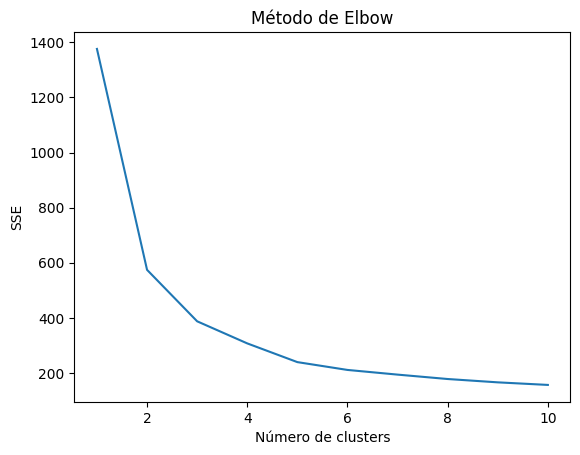


El número de pingüinos por cluster es: 
0    219
1    125
Name: cluster, dtype: int64



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


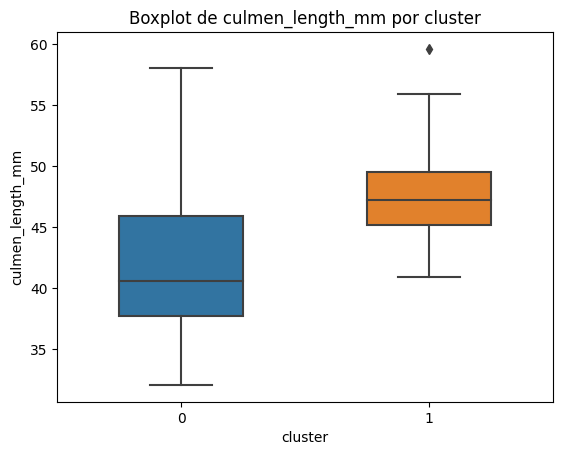

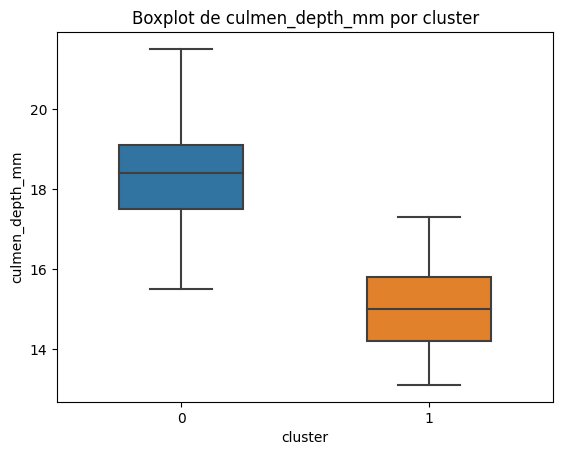

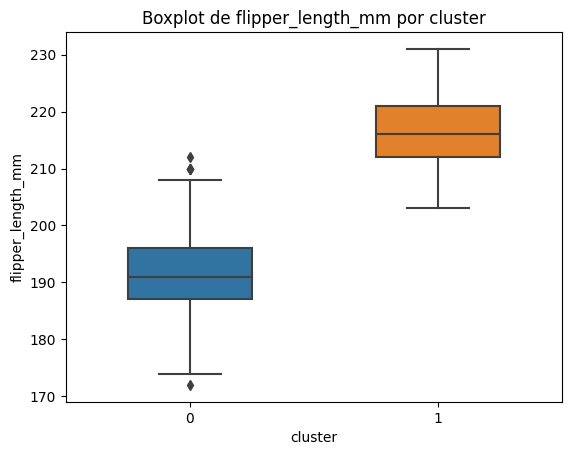

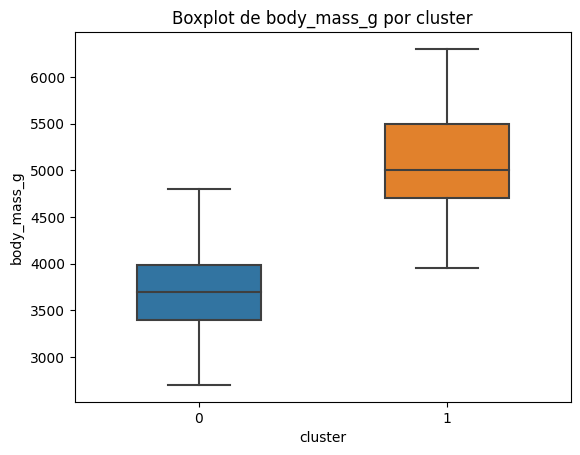


Diferencias respecto a la variable 'sexo'
cluster  sex   
0        FEMALE    107
         MALE      112
1        FEMALE     58
         MALE       66
dtype: int64

Distribución original de la variable 'species'
Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

Diferencias respecto a la variable 'species'
cluster  species  
0        Adelie       151
         Chinstrap     68
1        Adelie         1
         Gentoo       124
dtype: int64


In [ ]:
# Respuesta

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# antes de comenzar volvemos a asegurarnos de que vamos a trabajar con la
# variable con el outlier corregido para evitar que los datos sean sesgados
# en un "notebook" diferente hemos hecho varias pruebas para comprobar
# qué sucedía con las figuras si utilizábamos el conjunto original <peng>
# descubrimos que el método Elbow es bastante sensible a este cambio pues
# nos indicaba que el número de clusters tenía que ser más bien 4, utilizando
# la variable sin el outlier de longitud de aleta comprobamos que el resultado
# muestra 2 clusters, agrupaciones parecen tener más sentido que con 3 o 4

# el primer paso del proceso consiste en estandarizar las variables, es decir,
# las preparamos para poder trabajar con el algoritmo en cuestión, pero q

scaler = StandardScaler()

# vamos a seleccionar las columnas numéricas que vamos a pasar más abajo para
# hacer "fit" (en este caso se trata de ajustar más que de entrenar)

num_cols = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]

# a continuación ajustamos y transformamos los datos, esto es, lo que hacemos
# es básicamente estandarizar las columnas de <num_cols>
# y que el método para normalizar se encuentra descrito en:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html
# https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-normalization
# entiendo que tipificar se utiliza como estandarizar en dicha práctica
# por otro lado, según parece, K-means utiliza

peng_scaled = scaler.fit_transform(peng_anml[num_cols])

# creamos ahora un nuevo dataframe con los datos estandarizados
# el primer argumento es el scaler, y el segundo son las columnas
# esto lo hacemos para ver los valores estandarizados, obviamente

peng_scaled = pd.DataFrame(peng_scaled, columns=num_cols)

# mostramos las primeras filas y podemos ver que ahora tenemos el peso
# con una medida que sí nos permitirá realizar las operaciones necesarias

print(peng_scaled.head())

print()

# Creamos una lista vacía para guardar los valores de SSE
# https://stackoverflow.com/questions/53669094/how-can-i-get-sum-of-squared-errorssse-from-k-means-algorithm
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# buscar mañana en el curso de Stanford del sr. Indio y en DataCamp
# quizás confundo el mean error este...
sse = []

# creamos un bucle para probar con valores del 1 al 10

for k in range(1, 11):
    # Creamos el objeto kmeans con k clusters, esto es similar a lo visto
    # en los ejercicios resueltos (verificar para no meter la pata!)
    kmeans = KMeans(n_clusters=k)
    # ajustamos el modelo a los datos estandarizados, es decir
    # por un lado teníamos los datos de las columnas estandarizados, y por otro
    # los clusters, ahora lo juntamos todo y lo ajustamos
    kmeans.fit(peng_scaled)
    # añadimos el valor de SSE a la lista <sse> que lo que hace es determinar
    # cuál es el punto óptimo de "clusters"
    # en resumen, creamos una bucle que itera
    sse.append(kmeans.inertia_)

# creamos un gráfica para la lista de SSE
# comprobamos que el "codo" aparece sobre el número 2, a pesar de ello
# hemos comprobado resultado también con k=3, k=4 para ver qué sucedía

plt.plot(range(1, 11), sse)
plt.xlabel("Número de clusters")
plt.ylabel("SSE")
plt.title("Método de Elbow")
plt.show()
print()


# Elegimos k=2 como el número óptimo de clusters, allí donde la línea parece
# que comienza a aplanarse con claridad

kmeans = KMeans(n_clusters=2)

# ahora vamos a ajustar el modelo

kmeans.fit(peng_scaled)

# obtenemos las etiquetas de los grupos

labels = kmeans.labels_

# añadimos las etiquetas a una nueva columna
# ahora <cluster> incluye la etiquetas de los "clusters"

peng_anml["cluster"] = labels

# mostramos el número de pingüinos por cluster

print("El número de pingüinos por cluster es: ")
num_peng = peng_anml["cluster"].value_counts()
print(num_peng)

print()

# creamos los boxplot para cada variable para tratar de contestar a la pregunta
# ¿Se pueden apreciar diferencias entre grupos?
# para contestar a esta pregunta nos vamos a fijar en el rango intercuartil
# que es la diferencia entre el q3-q1, y en la mediana, que es la línea que
# tenemos dentro de la caja; el primero nos indica el rango en el que está
# el 50% por ciento de los datos, así que a simple vista, y aunque la explicación
# sea un poco rudimentaria, ya se puede observar que no están a la misma altura
# pero la clave (si he hecho bien el ejercicio) está en que la mediana
# entre cada cluster difiere significativamente, dicho de otra forma, parece que
# el algoritmo ha agrupado los datos en función de longitud de pico, profundidad,
# longitud de aleta y peso, es decir, en función de esa característica
# en un grupo ha colocado pingüinos con una longitud mayor y en otro menor
# se puede observar también que allí donde hay valores atípicos los ha agrupado
# en uno de los grupos, dejando sin "outliers" uno de los dos grupos

num_cols = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]
for col in num_cols:
    sns.boxplot(data=peng_anml, x="cluster", y=col, width=0.5)
    plt.title("Boxplot de {} por cluster".format(col))
    plt.show()

print()

# analizamos las diferencias respecto a la variable <sex>
# como podemos observar la distribución de género es bastante balanceada,
# es decir, al parecer el género no es el factor determinante para la creación
# de estas agrupaciones, lo sabríamos si uno de los dos destacase más que el otro

print("Diferencias respecto a la variable 'sexo'")
clustsex = peng_anml.groupby(["cluster", "sex"]).size()
print(clustsex)

print()

# ahora las diferencias con la especie original
# aquí el criterio de ordenación parece haber sido la similitud entre especies
# es decir, las especies "Adelie" y "Chinstrap" (se puede ver con los datos)
# son en términos generales más similares que con "Gentoo", que destacaría más
# en el valor de masa corporal, único valor en el que los dos primeros difieren
# de manera más clara también, en cualquier caso, parece que k-means hace lo
# que se supone que tiene que hacer, es decir, agrupar por grupos con similares
# características, dicho de otra forma "Adelie" y "Chinstrap" son más parecidos
# en sus características que con "Gentoo", especie que está asignada en su
# totalidad al cluster 1; aquí la pregunta intrigante (a mi nivel, claro)
# es ¿por qué tenemos un solo pingüino "Adelie" en el cluster 1?...¿un
# especimen diferente?, ¿errores de medición?
# de hecho hemos buscado al pingüino en cuestión y comprobamos que en comparación
# con la descripción de los datos para su especie, obtiene valores superiores
# en la profundidad y longitud del pico (no lo incluyo porque no se solicita)

print("Distribución original de la variable 'species'")
origspec = peng_anml["species"].value_counts()
print(origspec)

print()

print("Diferencias respecto a la variable 'species'")
clustspec = peng_anml.groupby(["cluster", "species"]).size()
print(clustspec)




# Ejercicio 3



En este ejercicio vamos a trabajar con un dataset de vinos de la misma región de Italia, pero derivados de tres cultivares diferentes, que puedes encontrar en la carpeta `data` bajo el nombre `wines.csv`.

a) Carga el dataset y haz el análisis de datos exploratorio para investigar qué datos hay en el dataset, cómo están distribuidos, si es necesario lidiar con datos incompletos o outliers, si alguna columna tiene el tipo de variable incorrecto, etc. Puedes ayudarte de las funciones de `pandas` que ya conocemos y de alguna gráfica. Explica tu razonamiento en cada paso y recuerda: ¡código no comentado adecuadamente se puntúa con cero!
b) Vamos a tratar de entender mejor la composición de los vinos. Seguramente muchas de las características físicas y químicas están correlacionadas de alguna manera. Utiliza una gráfica de correlación para analizarlo y explica tus conclusiones.

c) Podemos sacar algunas conclusiones, pero hay bastantes variables por lo que es difícil sacar algo en claro. A continuación, elige **dos pares** de columnas/características que, según tu análisis, creas que son interesantes de comparar. Utiliza la función `jointplot` de `seaborn` para comparar ambos pares en dos gráficas diferentes y customízalas según tu estilo favorito. Utiliza como variable z o 'hue' la 'clase' del vino. ¿Se mantienen tus conclusiones del apartado b)? ¿Cuál es el efecto de considerar la 'clase' del vino en el análisis exploratorio?

d) Para terminar este análisis exploratorio, visualiza en **`subplots`** utilizando gráficas **`violinplot`** la distribución de las características físicas y químicas de los vinos según la clase. Cada subplot deberá mostrar la información de una de las características, mientras que en el eje x estarán las tres clases de vinos, y en el eje y los valores (por ejemplo, el nivel de alcohol, o de ácido málico). ¿Qué conclusiones sacas respecto a la clase?

In [ ]:
# Respuesta

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
wines = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/prog_datasci_7/data/wines.csv")

# vamos a comenzar el ejercicio realizando un análisis exploratorio para
# tener una primera foto del conjunto de datos

# vamos primero a obtener información básica
# con esto vamos a ver si tenemos nulos y qué tipo de datos contiene cada
# variable del "dataset"; en nuestro caso parece que no hay,¡no cantemos victoria!,
# porque seguramente nos vamos a encontrar "outliers" como de costumbre

print("Aquí vamos a listar la información básica: ")
print(wines.info())

print()

print("Otra forma de ver si hay nulos: ")
print(wines.isnull().sum())

print()

# ahora que sabemos que no tenemos nulos (perdidos, etc.) vamos a por un clásico
# una descripción estadística del conjunto de datos

print("Estadísticos básicos: ")
print(wines.describe())

print()

# ya que hemos trabajado con boxplots para detectar valores atípicos
# vamos a continuar con la misma tónica puesto que existen razones para hacerlo
# https://medium.com/@martacasdelg/c%C3%B3mo-identificar-y-tratar-outliers-con-python-bf7dd530fc3

# creamos un bucle con el que iteramos por las columnas del "df"
# algo que ya hemos hecho en anteriores prácticas y resulta que resulta directo
# ajustamos la figura para que no sea muy grande y mostramos los gráficos
# podemos comprobar que sí existen valores atípicos, en concreto en 7 columnas
# antes, vamos a visualizar las 3 primeras filas del conjunto de datos
# habitualmente se suele listar más arriba, pero he creído oportuno hacerlo así
# para poder echar un vistazo rápido a las columnas si fuese necesario

print("Estas son las 3 primeras filas: ")
print(wines.head(n=3))

print()

print("A continuación mostramos los gráficos: ")

for col in wines.columns:
    plt.figure(figsize=(3, 3))
    plt.boxplot(wines[col])
    plt.title("Boxplot de " + col)
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

print()


# b, ahora vamos a crear un gráfico que nos muestre las relaciones que existen
# entre las variables del conjunto de datos; debemos tener en cuenta que una
# de las variables es de tipo categórica, el tipo de vino, a pesar de que se a
# convertido a número, cosa que hace que sea más conveniente utilizar
# en vez de un mapa de calor (idea inicial y muy bonita visualmente), un
# "scatterplot" en el que la variable categórica sea la que de color al gráfico
# un ejemplo, precisamente con el conjunto de datos de los pingüinos aquí:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html#:~:text=sns.pairplot(penguins%2C%20hue%3D%22species%22)
# el código es muy sencillo, pasamos el "dataset", le decimos que rellene con
# la variable que no interese, y por último le señalamos el tipo de gráfico
# existen más parámetros, pero con esto es más que suficiente
# atención: por defecto se muestra la leyenda a la derecha, pero hay que ampliar
# para ver a qué color corresponde cada número, sin ampliar ¡pasa despercibida!

print("Gráfica con pares de variables: ")
sns.pairplot(wines, hue="Class", kind="scatter")

plt.show()

# realmente se hace complicado difícil extraer conclusiones con tantos gráficos
# aunque sí se puede observar que existe grande diferencias de correlaciones
# en función del tipo de vino, por ejemplo, si miramos la correlación entre
# "flavanoids" y "total_phenols" podemos observar que parece ser que sí existe
# correlación para los tipos de vino 1 y 2, pero no para el 3...queremos decir
# que existen diferencias entre tipos de vino, en resumen, la clase de vino
# parece que actúa como variable diferenciadora, o al menos eso parece

# c, escogemos el primer par de características, la escogemos porque aparentemente
# vamos a observar la la correlación entre los "flavanoids" y los "total_phenols"
# https://www.vinetur.com/2023110876192/los-compuestos-fenolicos-y-su-papel-en-el-vino.html
# https://kena.com/flavonoides-y-los-beneficios-en-el-vino-tinto/#:~:text=Uno%20de%20los%20beneficios%20que%20tienen%20los%20vinos,la%20cual%20contiene%20propiedades%20antioxidantes%2C%20anticarcinog%C3%A9nicas%20y%20antinflamatorias.
# el segundo par de características las escogemos justo por lo contrario
# una vez vemos los gráficos, podemos decir con cierta seguridad que
# se mantiene lo dicho arriba, parece ser un conjunto de datos
# en el que existen diferencias notables entre los datos sobre los vinos, algo
# que sabemos precisamente por incorporar la la "clase" vino al análisis,
# obviamente, si no sabemos con qué tipo de vino estamos lidiando, nos va a ser
# imposible buscar correlaciones como las que solicita este ejercicio

sns.jointplot(data=wines, x="Total_Phenols", y="Flavanoids", hue="Class", kind="scatter")
plt.show()

# ahora, el segundo par de características que dibuja cómo correlaciona el
# alcohol con el color del vino

sns.jointplot(data=wines, x="Alcohol", y="Color_Intensity", hue="Class", kind="scatter")
plt.show()

print()

# vamos ahora a mostrar la infomación con "violinplot" para conocer la distrubución
# de las características en función de la clase del vino
# primero, creamos una lista que contenga todas las columnas menos "Class"

columnas = ["Alcohol", "Malic_Acid", "Ash", "Ash_Alcanity", "Magnesium",
"Total_Phenols", "Flavanoids", "Nonflavanoid_Phenols",
"Proanthocyanins", "Color_Intensity", "Hue", "OD280", "Proline"]


# como en anteriores prácticas, vamos a utlizar "subplots"
# aquí decimos: crea una figura y unos ejes, con un tamaño determinado,
# con la longitud de la lista características, o sea, las columnas

fig, axs = plt.subplots(len(columnas), figsize=(10, 5*len(columnas)))

# ahora, creamos un bucle que itera por toda la longitud de las columnas

for i, columna in enumerate(columnas):
    # aquí creamos un gráfico de violín para cada característica
    # que nos permitirá conocer su distrubución para cada clase de vino
    sns.violinplot(ax=axs[i], x='Class', y=columna, data=wines, hue="Class")

# aquí mostramos el gráfico

plt.tight_layout()
plt.show()

# a la vista de los gráficos de violín (sin ser en absoluto un experto) se
# se puede comprobar a simple vista que cada clase tiene una distrubución cuando
# su distribución, es decir, por cada característica podemos comprobar que según
# su "clase" la distribución de éstos (media, rango de los datos, densidad),
# varían considerablemente de una a otra, algo que estaría en consonancia con
# lo que hemos venido observando hasta el momento



In [ ]:
wines.columns


Index(['Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

# Ejercicio 4



Continuaremos con el mismo dataset, ya que empezamos a conocerlo. Un famoso supermercado te ha contratado para analizar este grupo de vinos italianos y está interesado en entender mejor cómo varían sus propiedades según el cultivar (la clase del vino). Desafortunadamente, con los análisis anteriores, es difícil sacar muchas conclusiones. Para hacer las cosas más fáciles, vamos a reducir la dimensionalidad del dataset.

a) Aplica PCA a las columnas numéricas del dataset, sin olvidarte de los pasos de preprocesamiento que puedan ser necesarios. Luego calcula el ratio de varianza explicada por cada componente y utiliza una gráfica para mostrarla. Explica el resultado.

b) ¿Cómo varían los valores de las componentes principales según la clase? Grafica las dos primeras componentes (una contra la otra) y muestra la clase por colores (variable z) para ver si PCA ha formado de forma natural clusters para cada cultivar. Razona: ¿qué ha ocurrido y por qué crees que es?

c) Te daremos un *spoiler*: deberías haber visto que al aplicar PCA hemos conseguido separar las clases de vino de una forma bastante efectiva. Sin embargo, todavía no sabemos interpretar bien los datos para informar al cliente, ya que no sabemos qué constituye cada componente principal. Averigua como extraer las cargas (o *loadings*) de las dos primeras componentes, muestra sus valores, e interpreta los resultados.

d) Finalmente, escribe un pequeño informe para el cliente donde interpretes los resultados y expliques, según los análisis de los apartados anteriores, cuáles son las características de los vinos que más influyen en cada una de las clases.


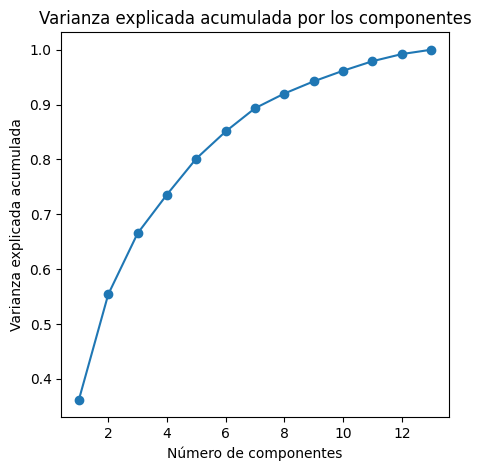

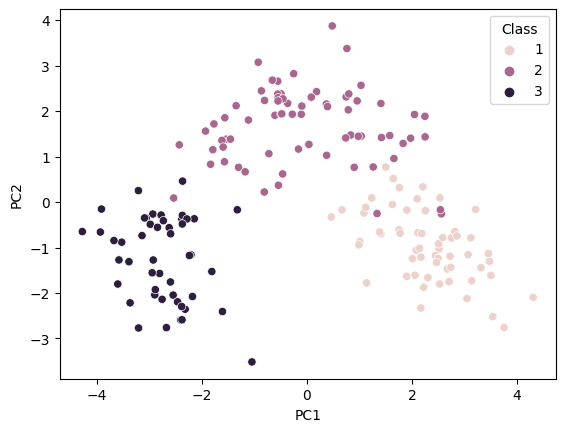



Valores de las cargas: 
                           PC1       PC2
Alcohol               0.144329 -0.483652
Malic_Acid           -0.245188 -0.224931
Ash                  -0.002051 -0.316069
Ash_Alcanity         -0.239320  0.010591
Magnesium             0.141992 -0.299634
Total_Phenols         0.394661 -0.065040
Flavanoids            0.422934  0.003360
Nonflavanoid_Phenols -0.298533 -0.028779
Proanthocyanins       0.313429 -0.039302
Color_Intensity      -0.088617 -0.529996
Hue                   0.296715  0.279235
OD280                 0.376167  0.164496
Proline               0.286752 -0.364903


In [ ]:
# Respuesta

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# volvemos a utilizar "StandardScaler" para estandarizar los datos
# esto es un requisito necesario para asegurarno de que la PCA funcione bien,
# ya que esta ténica para transformar los datos es sensible a las varianzas:
# https://cienciadedatos.net/documentos/py19-pca-python.html#:~:text=Al%20trabajar%20con%20varianzas%2C%20el%20m%C3%A9todo%20PCA%20es%20muy%20sensible%20a%20outliers

caract = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
                   'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
                   'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline']

scaler = StandardScaler()
wines_scaled = scaler.fit_transform(wines[caract])

# aplicamos la función PCA
# la PCA (análisis de componentes principales) se utiliza, como se deduce del
# enunciado del ejercicio, para reducir el número de datos, es decir, es una
# forma de simplificar la información pero sin perder los componentes más
# importantes de dicha información
# creamos la variable pca a la que pasamos la función PCA para después
# aplicarlo a los datos de <wines_scaled> que hemos escalado justo antes
# junto a la función <fit_transform> que ya hemos utilizado con anterioridad
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform

# ahora ajustaremos el modelo a los datos estandarizados y los transformaremos
# en los componentes principales, en otras palabras, el resultado es un conjunto
# de datos de menor dimensión

pca = PCA()

wines_pca = pca.fit_transform(wines_scaled)

# calculamos el ratio de varianza explicada, que lo que hace es calcular cuánta
# varianza de los datos se puede explicar cada componente de la PCA

explained_variance_ratio = pca.explained_variance_ratio_

# ahora mostramos un gráfico para ver los datos e interpretarlos

componentes = range(1, len(caract) + 1)
plt.figure(figsize=(5, 5))
plt.plot(componentes, np.cumsum(explained_variance_ratio), marker='o')

# añadimos títulos, etc.

plt.title('Varianza explicada acumulada por los componentes')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.show()

print()

# el gráfico muestra que a medida que se añaden más componentes aumenta la
# varianza explicada, es decir, cuánta varianza es capaz de explicar el modelo
# https://statologos.com/variacion-de-varianza-explicada/


# creamos ahora un "df" con pandas <pd.DataFrame> con los resultados de la PCA
# el nuevo "dataframe" contiene <wines_pca> que son los componentes de la PCA,
# y <columns>, que será una lista que resulta de la iteración de <i> sobre la
# longitud de la variable <carat>, la que contiene las características del vino,
# con un rango que va desde el primer elemento de la lista hasta el último, de
# ahí que se añade un +1 al final de la lista

df_pca = pd.DataFrame(wines_pca, columns=["PC" + str(i) for i in range(1, len(caract) + 1)])

# una vez hemos creado el nuevo "df", añadimos la columna <Class> del "df"
# original <wines> a la variable <df_pca> que acabamos de crear con los datos
# de la pca (¡menudo laberinto!)

df_pca["Class"] = wines["Class"]

# visualizamos los resultados coloreando, como ya hemos hecho anteriormente con
# el tipo de vino <Class>
# se puede observar que los datos de los componentes se agrupan en diversas
# zonas del gráfico, esto significaría que las diferencias son importantes, o
# por lo menos que han sido capturadas por estos dos componentes
# también se observa que existen agrupaciones (clusters), algo que reforzaría
# la idea que apuntábamos en cuanto a diferencias importantes

sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Class")
plt.show()

print()
print()

# extraemos las cargas de las dos primeras componentes
# las cargas son el "peso" de los datos originales en los componentes de la PCA
# cuánto contribuye cada variable original a cada componente principal

cargas = pca.components_[:2]

# creamos un "df" para visualizarlas, aquí hay que estar atentos para no
# incluir "Class" al final del código, sino caract, que es la lista sin ella

cargas = pd.DataFrame(cargas.T, columns=['PC1', 'PC2'], index=caract)

# mostramos los valores de las cargas
# según parece, en el PC1 vemos que los <Flavanoids> y <Total_Phenols>
# tienen bastante influencia, o dicho de otra forma, son características
# relevantes para con los vinos, si una característica aumenta, al ser positiva
# la relación, aumentará en los datos de PCA que vemos, y viceversa con los
# valores negativos, si tomamos por ejemplo <Color_Intensity> tanto en PC1/2
# vemos que correlacionan negativamente, es decir, si aumenta esa característica
# disminuye para PC1 y PC2...o dicho diferente, también tienen un peso importante
# pero en sentido inverso; resumiendo, estos tres componentes son características
# importantes para la variabilidad de los datos de los vinos

print("Valores de las cargas: ")
print(cargas)

# informe para el cliente
# Estimado cliente: el análisis de componentes llevado a cabo nos muestra que
# estamos ante vinos con perfiles distintos, aquí un breve resumen:
# para la clase 1, los datos se acumulan en la parte positiva de la PC1
# lo que sugiere que esta clase de vinos posee características únicas
# la clase 2 se agrupa en ambas partes de la PC1, positiva y negativa, así como
# en la parte positiva de PC2, indicando que contiene mezcla de características
# la clase 3 se agrupa en la parte negativa de ambas PC's, lo que nos indica
# que tienen una relación inversa con respecto a las características del vino
# en resumen, espero que esta información le sea útil para comprender algo mejor
# cómo influyen las características en sus vinos, de manera que pueda clasificarlos
# y dirigir sus productos a los mercados más adecuados con éxito
# asimismo, tenga en cuenta que las PC1 y las PC2 son formas simplificadas de
# representar un conjunto de datos más complejo con las que mostrar las
# diferencias entre ambos
# atentamente: un estudiante de ciencia de datos

In [ ]:
# bonus track

# una función para saber las correlaciones por característica

print(wines.columns)

def correlation():
    # pedimos al usuario que introduzca la variable
    variable = input("Por favor, introduce el nombre de la variable: ")

    # una condición por si la variable no existe en el "df"
    if variable not in wines.columns:
        return "La variable no se encuentra en el conjunto de datos."

    # calculamos la correlación
    correlat = wines.corr()

    # ahora obtenemos la correlación de la variable con respecto al resto
    variable_correlat = correlat[variable]

    # devolvemos las correlaciones
    return variable_correlat

# finalmente llamamos a la funció que hemos creado arriba para que el usuario
# introduzca la variable que quiera, es una adaptación del ejercicio de los
# pokémon (más o memos)

print(correlation())


Index(['Class', 'Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')
Por favor, introduce el nombre de la variable: Flavanoids
Class                  -0.847498
Alcohol                 0.236815
Malic_Acid             -0.411007
Ash                     0.115077
Ash_Alcanity           -0.351370
Magnesium               0.195784
Total_Phenols           0.864564
Flavanoids              1.000000
Nonflavanoid_Phenols   -0.537900
Proanthocyanins         0.652692
Color_Intensity        -0.172379
Hue                     0.543479
OD280                   0.787194
Proline                 0.494193
Name: Flavanoids, dtype: float64


# Ejercicio 5



El cliente se ha quedado muy contento con el informe, pero ahora tiene otra pregunta. Quieren expandir su variedad a otros viñedos y le gustaría poder predecir la cantidad de alcohol que tiene cada vino en función de sus propiedades, para poder garantizar una mejor variedad a los consumidores.

a) Utiliza la función `LinearRegression` de `Scikit-Learn` para realizar una regresión lineal para predecir la cantidad de alcohol según las propiedades del vino. Utiliza la técnica de `KFold` para validar el modelo repitiéndolo 10 veces y presenta la media de R2 y su desviación estándar. ¿Crees que el nivel de alcohol se puede predecir bien?

b) El cliente ahora está interesado en las otras propiedades físicas. Utilizando bucles, aplica regresiones lineales a *todas* las propiedades físicas y químicas de los vinos, utilizando como predictoras el resto de variables. Utiliza de nuevo `KFold` con 10 repeticiones y guarda su R2 en un diccionario. Finalmente: ¿qué variable es la "más predecible"?

c) Resulta que los consumidores compran más a menudo el vino de la clase 1, por lo que al supermercado le gustaría poder predecir la clase del vino según sus propiedades, para comprar más de este tipo de vino. Entrena un modelo de clasificación [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), teniendo en cuenta que la 'Clase' del vino es una variable categórica, no numérica. ¿Crees que se puede clasificar la clase del vino con precisión?

d) **Opcional** Sería interesante saber qué propiedades (o features) de los vinos tienen mayor impacto en la clasificación Random Forest y correlacionarla con el análisis de los ejercicios anteriores. Existe una librería llamada [SHAP](https://shap-lrjball.readthedocs.io/en/latest/index.html) (SHapley Additive exPlanations) que nos puede ayudar a interpretar algunos modelos de aprendizaje (*machine learning*). Utiliza esta librería para mostrar las *features* con mayor importancia (y en qué dirección) y analiza los resultados según los análisis de los ejercicios anteriores. ¿Cuadra todo? EI

**Nota:** para este ejercicio opcional tendrás que utilizar las funciones `TreeExplainer` y `summary_plot` de SHAP y este [link](https://stackoverflow.com/questions/65549588/shap-treeexplainer-for-randomforest-multiclass-what-is-shap-valuesi) te puede ayudar.


In [ ]:
# Respuesta

# para llevar a cabo este ejercicio primero vamos a importar
# todas las librerías que vamos a necesitar

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# definimos la variable predictora y la variable objetivo
# de la predictora eliminamos la variable <Alcohol>, que es la
# utilizaremos como variable objetivo, de esta manera la eliminamos
# es importante incluir <axis=1> porque de lo contrario pandas entiende
# por defecto que debe eliminar las filas, se habla aquí de ello:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html#:~:text=a%20list%2Dlike.-,axis,%7B0%20or%20%E2%80%98index%E2%80%99%2C%201%20or%20%E2%80%98columns%E2%80%99%7D%2C%20default%200,-Whether%20to%20drop

X = wines.drop("Alcohol", axis=1)
y = wines["Alcohol"]

# creamos el modelo de regresión lineal

model = LinearRegression()

# ajustamos el número de repeticiones, "splits" para la validación cruzada
# esto, esto viene a decir que KFold distribuye los datos en una serie de partes
# o "folds" que <cross_val_score> valida para conocer su rendimiento
# hay que adentrarse en la documentación para encontrar bien qué buscamos:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html
# https://scikit-learn.org/stable/modules/cross_validation.html#k-fold
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

kf = KFold(n_splits=10, shuffle=True, random_state=1)

# a continuación calculamos la R2 con validación cruzada, que sirve para
# R2 es lo que se conoce como coeficiente de determinación, que dicho fácil
# nos dice lo bien que se predice una variable con la ayuda de las demas

r2_scores = cross_val_score(model, X, y, cv=kf, scoring="r2")

# ahora vamos con la media y la desviación estándar y las imprimimos
# los resultados nos indican que el modelo es moderadamente fiable, en otras
# palabras, la media de R2 nos indica que el modelo puede explicar (aprox.)
# el 45% de la variabilidad en el contenido de alcohol en función del tipo de
# vino; un valor cercano al 1 indicaría mayor robustez del modelo

print("R2 media: {}".format(r2_scores.mean()))

# en cuanto a la desviación estándar, este número, 0.3754306207743783 nos está
# indicando que aunque no es muy elevado, sí existe cierta variabilidad
# en función del conjunto de datos ("folds") que está utilizando para la
# validación cruzada; en este caso, un valor cercano a 0 sería lo ideal y nos
# estaría señalando que las diferentes particiones son más consistentes,
# es decir, el modelo sería más fiable
print("R2 desviación estándar: {}".format(r2_scores.std()))

print()
print()

# b, Creamos un diccionario para guardar los R2 de cada variable
# usamos un diccionario porque nos permite almacenar una clave y un valor
# en este caso sería

r2_dict = {}

# creamos el modelo de regresión lineal que vamos a utilizar en las iteraciones

model = LinearRegression()

# Definimos el KFold fuera del bucle
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# creamos un bucle que itere por cada columna del "df", excepto "Class"
for col in [c for c in wines.columns if c != "Class"]:

    # aquí definimos las variables predictoras y la variable objetivo
    # la predictoras son las columnas de <wine> menos la columna que itera,
    # de ahí que pongamos <drop> (con axis=1 tal y como hemos explicado arriba)
    X = wines.drop(col, axis=1)
    y = wines[col]

    # calculamos la R2 de nuevo, y medimos cuánta variabilidad puede ser
    # explicada en cada iteración de la variable dependiente respecto a la
    # independiente...veamos si lo podemos explicar más claro
    # con cada iteración cambiamos la variable dependiente para medir cuánto de
    # su variabilidad puede ser explicada por el resto de variables
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring="r2")

    # guardamos la media de R2 en el diccionario, esta media nos sirve para
    # determinar qué variable es la más predecible según el R2 sea más alto
    r2_dict[col] = r2_scores.mean()

# ahora imprimimos los resultados que muestran que la la variable "Flavanoids",
# precisamente una de las que habíamos incluído en el ejercicio 4
# es, según el modelo, la más fácil de predecir

print("La variable más predecible es: {}".format(max(r2_dict, key=r2_dict.get)))

print()
print()

# c, ahora vamos a definir la variable predictora, sin "Class", y la variable
# objetivo, que es "Class", precisamente la que hemos eliminado

X = wines.drop("Class", axis=1)
y = wines["Class"]

# en este punto creamos el modelo de Random Forest, que de forma convencional
# llamaremos "model", entre paréntiesis creamos una "seed", algo que ya hemos
# hecho en anteriores prácticas para asegurar la reproducibilidad

model = RandomForestClassifier(random_state=1)

# este siguiente código es una repetición del código del apartado anterior

kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Calculamos la precisión con validación cruzada
accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring="accuracy")

# Imprimimos la media de la precisión
print("Precisión media: {}".format(accuracy_scores.mean()))

# a juzgar por el valor de precisión, cercano al 1, podemos decir que sí es
# posible clasificar correctamente los vinos dada su clase
# https://stackoverflow.com/questions/61175776/why-random-forest-always-give-1-0-prediction-score
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html







R2 media: 0.44997513589312377
R2 desviación estándar: 0.3754306207743783


La variable más predecible es: Flavanoids


Precisión media: 0.9774509803921569
